## シルエットスコアによるクラスタリングの品質推定

クラスタリングが上手くいったかどうかを品質測定するために、シルエットスコアという値を用いてクラスタの品質（凝集度）を測定する

*silhouette score = (p - q) / max(p, q)*  

あるデータAに対して  
pはデータが属していない最も近いクラスタのデータとの平均距離  
qはデータが属しているクラスタの全データとの平均距離  

シルエットスコアは1から-1を取る  
1は同じクラスタ内のデータと非常に類似している  
-1は他のデータと類似していないことになる  

分子：  
p > qであれば正となる（データAが属していないクラスタとの距離が、属しているクラスタとの距離に比べ大きい）  
p < qであれば負となる（データAが属しているクラスタとの距離が、属していないクラスタとの距離に比べ大きい）  

分母：  
p、もしくはqのどちらか大きい方。  
分母はデータAが属している、いないに関わらず大きい方の距離を評価値の尺度とする

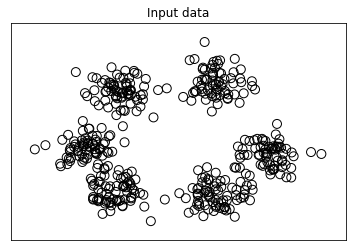

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans

# ファイルを読み込む
input_file = './data/data_quality.txt'
X = np.loadtxt(input_file, delimiter=',')

# グラフ化する
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', color='black', s=80)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.title('Input data') 
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [4]:
scores = []

# ぱっと見6つのクラスタに見えるけど、
# ここでは2〜10までのクラスタ数で調べて最適なクラスタ数を求めてみる事にする
values = np.arange(2, 10)

# クラスタ数を変化させて計算する
for num_clusters in values:
    # K平均法で行う
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    # 訓練
    kmeans.fit(X)
    # ユークリッド距離を用いてシルエットスコアの計算を行う
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    # クラスタ数とスコアを出す
    print("\nNumber of clusters =", num_clusters) 
    print("Silhouette score =", score) 

    scores.append(score)


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734872

Number of clusters = 4
Silhouette score = 0.579480188968759

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5534431935843214

Number of clusters = 8
Silhouette score = 0.5089405875979875

Number of clusters = 9
Silhouette score = 0.45337128444485614


### 推察

やっぱりクラスタ数6が一番良さそう。  
クラスタ数毎にシルエットスコアをグラフ化する

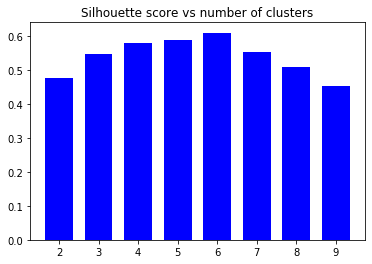

In [5]:
# クラスタ数とシルエットスコアを棒グラフで表示する
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters') 
plt.show()

In [8]:
# 最良のクラスタ数を出す。インデックス数に調査したクラスタの最小値を足してる。割とめんどくさい出し方。
num_clusters = np.argmax(scores) + values[0]
print('Optimal number of clusters =', num_clusters) 

Optimal number of clusters = 6
